In [1]:
import pandas as pd
import datetime
from os import listdir
import os, os.path
from os.path import isfile, join
import numpy as np
import csv
import re
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos_raw = pd.read_excel("./grouped table of annotations.xlsx")
#datos_raw = pd.read_excel("./ejemplo rum.xlsx")
# datos_raw.loc[0][1]
datos_raw

,A1 P2 BPI 2020,A2 P2 BPI 2020,A7 P2 BPI 2020,A10 P2 BPI 2020,A12 P2 BPI 2020,A13 P2 BPI 2020,A18 P2 BPI 2020,A25 P2 BPI 2020,A26 P2 BPI 2020,A28 P2 BPI 2020,...,A30 P2 BPI 2020,A31 P2 BPI 2020,A19 P4 BPI 2020,A27 P4 BPI 2020,A31 P4 BPI 2020,A19 P5 BPI 2020,A30 P5 BPI 2020,A34 P5 BPI 2020,A30 P6 BPI 2020,A19 P1 BPI 2020
0,Academic,Student,Academic,Academic,Professional,Professional,Academic,Student,Professional,Professional,...,Academic,Professional,Professional,Professional,Professional,Professional,Academic,Academic,Academic,Professional
1,Calculate cycle time of the whole process for ...,Get cycle time from the previous question,Calculate throughput,Represent boxplots of cycle time,Calculate throughput,Calculate cycle time of only a subset of pairs...,Calculate Statistics of cycle time,Get cycle time from the previous question,Get cycle time from the previous question,Get cycle time from the previous question,...,Group traces by month,Compare cycle time,Filter traces by frequency,Group activities by role,Calculate Statistics of cycle time,Filter traces by frequency,Filter activities by frequency,Calculate frequency of activities,Calculate cycle time for all pairs of events f...,Preprocess the traces of the logs
2,Compare cycle time,Compare cycle time,Comparative of throughput,Compare cycle time,Preprocess the traces of the logs,Compare cycle time,NaN,Compare cycle time,Compare cycle time,Represent histograms of cycle time,...,Calculate cycle time of the whole process for ...,NaN,Group traces by activities,Calculate percentage of traces,Identify activities with cycle time,Group traces by activities,Calculate cycle time for all pairs of events f...,Calculate Statistics of cycle time,Identify activities as bottlenecks applying te...,Group traces by year
3,NaN,NaN,Comparative of throughput,NaN,Calculate throughput,Identify specific subprocesses,NaN,Calculate cycle time of the whole process for ...,NaN,Compare cycle time,...,Identify values of attributes,NaN,Represent temporal series of activities,Calculate number of events,NaN,Represent temporal series of activities,Calculate Statistics of cycle time,Identify activities as bottlenecks applying te...,Identify transitions by cycle time,Calculate number of traces
4,NaN,NaN,Represent scatterplot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Group traces by month,NaN,Identify activities with cycle time,NaN,NaN,Identify activities with cycle time,Identify activities as bottlenecks applying te...,NaN,NaN,Represent temporal series of traces
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Calculate cycle time of the whole process for ...,NaN,Calculate Statistics of throughput,NaN,NaN,Calculate Statistics of throughput,Identify activities as bottlenecks applying te...,NaN,NaN,Filter events by activities
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Identify values of attributes,NaN,Identify transitions by cycle time,NaN,NaN,Identify transitions by cycle time,Represent bar charts of traces,NaN,NaN,Represent temporal series of activities
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Identify values of attributes,NaN,Group traces by activities,NaN,NaN,Group traces by activities,Represent histograms of cycle time,NaN,NaN,Group traces by year
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Identify values of attributes,NaN,Represent temporal series of activities,NaN,NaN,Represent temporal series of activities,Filter traces by activities,NaN,NaN,Group traces by activities
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Calculate number of events,NaN,Filter traces by frequency,NaN,NaN,Filter traces by frequency,Calculate percentage of traces,NaN,NaN,Calculate Statistics of activities


In [4]:
# datos_raw = pd.read_excel("./grouped table of annotations.xlsx")
# datos_raw=datos_raw.drop(['Unnamed: 0'], axis='columns')
glosario = pd.read_excel("./OperationCoding (solo cycle time).xlsx")
glosario['General operations'] = glosario['General operations'].fillna(method='pad')
glosario['Specific operations'] =  glosario['Specific operations'].str.split().str.join(' ')
glosario['General operations'] =  glosario['General operations'].str.split().str.join(' ')

# columns=['case:concept:name','General operation','Specific operation','Time','Question','Year', 'Category']
columns=['case:concept:name','concept:name','Specific operation','time:timestamp', 'Report', 'Question','Year', 'Category']
#columna es el case_ID
cont = 0
df_prueba= pd.DataFrame(columns=columns)
for columna in datos_raw.columns:
    acciones_analisis=datos_raw[columna].dropna()
    for accion in acciones_analisis:
        
        accion = re.sub('[\xa0]', ' ', accion)
        print(' *************************** ', accion)
        string_dividido=accion.split(' ')
        accion = ' '.join(string_dividido)
        for fila in range(len(glosario)):
                       
            if(accion == glosario['Specific operations'][fila]):
                #print('si', accion)
                accionGeneral=glosario['General operations'][fila]
                accionEspecifica=accion
                columnaSeparada=columna.split()
                report=columnaSeparada[0]
                pregunta=columnaSeparada[1]
                año=columnaSeparada[3]
                categoria=datos_raw.loc[0][columna]
                ct=datetime.datetime.now() + datetime.timedelta(days=1)
                new_row={'case:concept:name':columna, 'concept:name':accionGeneral,
                         'Specific operation':accionEspecifica,'time:timestamp':str(ct),
                         'Report':report, 'Question':pregunta, 'Year':año, 'Category':categoria} 
                print(cont, new_row['case:concept:name'])
                cont = cont +1
                df_prueba = df_prueba.append(new_row, ignore_index=True)
                
            elif(accion == glosario['General operations'][fila]):
                #print('no', accion)
                accionGeneral=accion
                accionEspecifica=" "
                columnaSeparada=columna.split()
                report=columnaSeparada[0]
                pregunta=columnaSeparada[1]
                año=columnaSeparada[3]
                categoria=datos_raw.loc[0][columna]
                ct=datetime.datetime.now() + datetime.timedelta(days=1)
                new_row={'case:concept:name':columna, 'concept:name':accionGeneral,
                         'Specific operation':accionEspecifica,'time:timestamp':str(ct),
                         'Report':report, 'Question':pregunta,'Year':año, 'Category':categoria} 
                print(cont, new_row['case:concept:name'])
                cont = cont +1
                df_prueba = df_prueba.append(new_row, ignore_index=True)
            
                
            
df_prueba

 ***************************  Academic
 ***************************  Calculate cycle time of the whole process for all traces
0 A1 P2 BPI 2020
 ***************************  Compare cycle time
1 A1 P2 BPI 2020
 ***************************  Student
 ***************************  Get cycle time from the previous question
2 A2 P2 BPI 2020
 ***************************  Compare cycle time
3 A2 P2 BPI 2020
 ***************************  Academic
 ***************************  Calculate throughput
4 A7 P2 BPI 2020
 ***************************  Comparative of throughput
5 A7 P2 BPI 2020
 ***************************  Comparative of throughput
6 A7 P2 BPI 2020
 ***************************  Represent scatterplot
7 A7 P2 BPI 2020
 ***************************  Academic
 ***************************  Represent boxplots of cycle time
8 A10 P2 BPI 2020
 ***************************  Compare cycle time
9 A10 P2 BPI 2020
 ***************************  Professional
 ***************************  Calculate throug

 ***************************  Get cycle time from the previous question
88 A10 P5 BPI 2020
 ***************************  Identify activities as bottlenecks applying temporal performance criteria
89 A10 P5 BPI 2020
 ***************************  Calculate number of activities
90 A10 P5 BPI 2020
 ***************************  Professional
 ***************************  Get cycle time from the previous question
91 A12 P5 BPI 2020
 ***************************  Represent bar charts of cycle time
92 A12 P5 BPI 2020
 ***************************  Identify activities as bottlenecks applying temporal performance criteria
93 A12 P5 BPI 2020
 ***************************  Professional
 ***************************  Represent process map with cycle time
94 A13 P5 BPI 2020
 ***************************  Calculate cycle time for all pairs of events for all traces
95 A13 P5 BPI 2020
 ***************************  Identify activities as bottlenecks applying temporal performance criteria
96 A13 P5 BPI 2020
 **

 ***************************  Identify organizational units as bottlenecks applying temporal performance criteria
197 A9 P5 BPI 2015
 ***************************  Academic
 ***************************  Filter traces by activities
198 A1 P1 BPI 2020
 ***************************  Calculate cycle time of the whole process for a subset of traces
199 A1 P1 BPI 2020
 ***************************  Calculate throughput
200 A1 P1 BPI 2020
 ***************************  Filter traces by attributes
201 A1 P1 BPI 2020
 ***************************  Calculate cycle time of the whole process for a subset of traces
202 A1 P1 BPI 2020
 ***************************  Student
 ***************************  Calculate cycle time of the whole process for all traces
203 A2 P1 BPI 2020
 ***************************  Academic
 ***************************  Filter traces by activities
204 A7 P1 BPI 2020
 ***************************  Calculate percentage of traces
205 A7 P1 BPI 2020
 ***************************  Calcul

303 A7 P1 BPI 2017
 ***************************  Calculate frequency of resources
304 A7 P1 BPI 2017
 ***************************  Calculate waiting time
305 A7 P1 BPI 2017
 ***************************  Student
 ***************************  Filter traces by activities
306 A8 P1 BPI 2017
 ***************************  Calculate waiting time
307 A8 P1 BPI 2017
 ***************************  Represent bar charts of waiting time
308 A8 P1 BPI 2017
 ***************************  Calculate waiting time
309 A8 P1 BPI 2017
 ***************************  Represent bar charts of waiting time
310 A8 P1 BPI 2017
 ***************************  Calculate waiting time
311 A8 P1 BPI 2017
 ***************************  Identify activities as bottlenecks applying temporal performance criteria
312 A8 P1 BPI 2017
 ***************************  Student
 ***************************  Calculate processing time
313 A9 P1 BPI 2017
 ***************************  Calculate waiting time
314 A9 P1 BPI 2017
 ***************

 ***************************  Calculate cycle time of only a subset of pairs of events for each subset of traces
393 A1 P2 BPI 2019
 ***************************  Represent bar charts of cycle time
394 A1 P2 BPI 2019
 ***************************  Compare cycle time
395 A1 P2 BPI 2019
 ***************************  Filter traces by activities
396 A1 P2 BPI 2019
 ***************************  Calculate number of traces
397 A1 P2 BPI 2019
 ***************************  Calculate throughput
398 A1 P2 BPI 2019
 ***************************  Calculate frequency of attributes
399 A1 P2 BPI 2019
 ***************************  Represent circular charts of attributes of the traces
400 A1 P2 BPI 2019
 ***************************  Student
 ***************************  Group traces depending on attributes
401 A3 P2 BPI 2019
 ***************************  Calculate cycle time for all pairs of events for each subset of traces
402 A3 P2 BPI 2019
 ***************************  Calculate percentage of events
40

 ***************************  Calculate Statistics of attributes
495 A15 P2 BPI 2019
 ***************************  Filter traces by activities
496 A15 P2 BPI 2019
 ***************************  Calculate percentage of traces
497 A15 P2 BPI 2019
 ***************************  Filter traces by activities
498 A15 P2 BPI 2019
 ***************************  Calculate percentage of traces
499 A15 P2 BPI 2019
 ***************************  Filter events by activities
500 A15 P2 BPI 2019
 ***************************  Preprocess the events of the logs
501 A15 P2 BPI 2019
 ***************************  Group traces according to the repetition of activities
502 A15 P2 BPI 2019
 ***************************  Calculate cycle time of only a subset of pairs of events for each subset of traces
503 A15 P2 BPI 2019
 ***************************  Calculate number of traces
504 A15 P2 BPI 2019
 ***************************  Calculate Statistics of attributes
505 A15 P2 BPI 2019
 ***************************  Repre

 ***************************  Get cycle time from the previous question
608 A11 P2 BPI 2020
 ***************************  Compare cycle time
609 A11 P2 BPI 2020
 ***************************  Professional
 ***************************  Filter traces by activities
610 A11 P4 BPI 2020
 ***************************  Calcute number of values of an attribute
611 A11 P4 BPI 2020
 ***************************  Calculate frequency of activities
612 A11 P4 BPI 2020
 ***************************  Calculate throughput
613 A11 P4 BPI 2020
 ***************************  Calculate throughput
614 A11 P4 BPI 2020
 ***************************  Calculate throughput
615 A11 P4 BPI 2020
 ***************************  Calcute number of values of an attribute
616 A11 P4 BPI 2020
 ***************************  Identify values of attributes
617 A11 P4 BPI 2020
 ***************************  Professional
 ***************************  Filter traces by year
618 A11 P5 BPI 2020
 ***************************  Calculate cycl

 ***************************  Calculate cycle time of the whole process for all traces
724 A24 P1 BPI 2020
 ***************************  Filter traces by cycle time
725 A24 P1 BPI 2020
 ***************************  Calculate percentage of traces
726 A24 P1 BPI 2020
 ***************************  Calculate processing time
727 A24 P1 BPI 2020
 ***************************  Calculate cycle time of a fragment of the process for a subset of traces
728 A24 P1 BPI 2020
 ***************************  Calculate cycle time of a fragment of the process for a subset of traces
729 A24 P1 BPI 2020
 ***************************  Calculate cycle time of the whole process for a subset of traces
730 A24 P1 BPI 2020
 ***************************  Calculate frequency of traces
731 A24 P1 BPI 2020
 ***************************  Calculate percentage of traces
732 A24 P1 BPI 2020
 ***************************  Calculate processing time
733 A24 P1 BPI 2020
 ***************************  Represent histograms of cycle 

837 A12 P2 BPI 2019
 ***************************  Calculate Statistics of cycle time
838 A12 P2 BPI 2019
 ***************************  Calculate cycle time of a fragment of the process for a subset of traces
839 A12 P2 BPI 2019
 ***************************  Group traces depending on attributes
840 A12 P2 BPI 2019
 ***************************  Calculate cycle time of a fragment of the process for each subset of traces
841 A12 P2 BPI 2019
 ***************************  Group traces depending on attributes
842 A12 P2 BPI 2019
 ***************************  Calculate Statistics of cycle time
843 A12 P2 BPI 2019
 ***************************  Group events by attributes
844 A12 P2 BPI 2019
 ***************************  Calculate cycle time for all pairs of events for each subset of traces
845 A12 P2 BPI 2019
 ***************************  Group traces depending on attributes
846 A12 P2 BPI 2019
 ***************************  Calculate number of traces
847 A12 P2 BPI 2019
 ************************

930 A30 P5 BPI 2020
 ***************************  Academic
 ***************************  Calculate frequency of activities
931 A34 P5 BPI 2020
 ***************************  Calculate Statistics of cycle time
932 A34 P5 BPI 2020
 ***************************  Identify activities as bottlenecks applying temporal performance criteria and statistical measures
933 A34 P5 BPI 2020
 ***************************  Academic
 ***************************  Calculate cycle time for all pairs of events for all traces
934 A30 P6 BPI 2020
 ***************************  Identify activities as bottlenecks applying temporal performance criteria
935 A30 P6 BPI 2020
 ***************************  Identify transitions by cycle time
936 A30 P6 BPI 2020
 ***************************  Professional
 ***************************  Preprocess the traces of the logs
937 A19 P1 BPI 2020
 ***************************  Group traces by year
938 A19 P1 BPI 2020
 ***************************  Calculate number of traces
939 A19 P1

,case:concept:name,concept:name,Specific operation,time:timestamp,Report,Question,Year,Category
0,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-11-06 10:23:13.262926,A1,P2,2020,Academic
1,A1 P2 BPI 2020,Compare cycle time,,2021-11-06 10:23:13.278546,A1,P2,2020,Academic
2,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-11-06 10:23:13.278546,A2,P2,2020,Student
3,A2 P2 BPI 2020,Compare cycle time,,2021-11-06 10:23:13.278546,A2,P2,2020,Student
4,A7 P2 BPI 2020,Calculate throughput,,2021-11-06 10:23:13.294139,A7,P2,2020,Academic
...,...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,Group traces,Group traces by year,2021-11-06 10:23:17.218424,A19,P1,2020,Professional
944,A19 P1 BPI 2020,Group traces,Group traces by activities,2021-11-06 10:23:17.218424,A19,P1,2020,Professional
945,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2021-11-06 10:23:17.218424,A19,P1,2020,Professional
946,A19 P1 BPI 2020,Calculate throughput,,2021-11-06 10:23:17.234046,A19,P1,2020,Professional


In [ ]:
# datos_raw = pd.read_excel("./grouped table of annotations.xlsx")
# # datos_raw=datos_raw.drop(['Unnamed: 0'], axis='columns')
# glosario = pd.read_excel("./OperationCoding (solo cycle time).xlsx")
# glosario['General operations'] = glosario['General operations'].fillna(method='pad')
# glosario['Specific operations'] =  glosario['Specific operations'].str.split().str.join(' ')
# glosario['General operations'] =  glosario['General operations'].str.split().str.join(' ')

# # columns=['case:concept:name','General operation','Specific operation','Time','Question','Year', 'Category']
# columns=['case:concept:name','General operation', 'concept:name', 'time:timestamp', 'Report', 'Question','Year', 'Category']
# #columna es el case_ID
# cont = 0
# df_prueba= pd.DataFrame(columns=columns)
# for columna in datos_raw.columns:
#     acciones_analisis=datos_raw[columna].dropna()
#     for accion in acciones_analisis:
        
#         accion = re.sub('[\xa0]', ' ', accion)
#         print(' *************************** ', accion)
#         string_dividido=accion.split(' ')
#         accion = ' '.join(string_dividido)
#         for fila in range(len(glosario)):
                       
#             if(accion == glosario['Specific operations'][fila]):
#                 #print('si', accion)
#                 accionGeneral=glosario['General operations'][fila]
#                 accionEspecifica=accion
#                 columnaSeparada=columna.split()
#                 report=columnaSeparada[0]
#                 pregunta=columnaSeparada[1]
#                 año=columnaSeparada[3]
#                 categoria=datos_raw.loc[0][columna]
#                 ct=datetime.datetime.now() + datetime.timedelta(days=1)
#                 new_row={'case:concept:name':columna, 
#                          'General operation':accionGeneral, 'concept:name':accionEspecifica, 'time:timestamp':str(ct),
#                          'Report':report, 'Question':pregunta, 'Year':año, 'Category':categoria} 
#                 print(cont, new_row['case:concept:name'])
#                 cont = cont +1
#                 df_prueba = df_prueba.append(new_row, ignore_index=True)
                
#             elif(accion == glosario['General operations'][fila]):
#                 #print('no', accion)
#                 accionGeneral=accion
#                 accionEspecifica=" "
#                 columnaSeparada=columna.split()
#                 report=columnaSeparada[0]
#                 pregunta=columnaSeparada[1]
#                 año=columnaSeparada[3]
#                 categoria=datos_raw.loc[0][columna]
#                 ct=datetime.datetime.now() + datetime.timedelta(days=1)
#                 new_row={'case:concept:name':columna, 
#                          'General operation':accionGeneral, 'concept:name':accionEspecifica,'time:timestamp':str(ct),
#                          'Report':report, 'Question':pregunta,'Year':año, 'Category':categoria} 
#                 print(cont, new_row['case:concept:name'])
#                 cont = cont +1
#                 df_prueba = df_prueba.append(new_row, ignore_index=True)
            
                
            
# df_prueba

In [ ]:
df_prueba

In [ ]:
log = log_converter.apply(df_prueba)
# xes_exporter.apply(log, './Log CT.xes')
xes_exporter.apply(log, './ejemplo rum.xes')
#  xes_exporter.apply(log, './Prueba.xes')

In [ ]:
df_prueba.to_csv('Log CT.csv')

In [ ]:
# df_prueba = pd.read_csv('Log CT con categorias.csv')

In [ ]:
n_acciones = df_prueba['Category'].value_counts()
n_acciones

In [ ]:
#promedio de acciones por analisis
cat_año = df_prueba.groupby(['Category', 'Year'])
n_analisis = cat_año.apply(lambda x: len(x["Report"].unique()))
print('Académico:', n_acciones['Académico']/n_analisis['Académico'].sum())
print('Estudiante:', n_acciones['Estudiante']/n_analisis['Estudiante'].sum())
print('Profesional:', n_acciones['Profesional']/n_analisis['Profesional'].sum())

In [ ]:
cat = df_prueba.groupby(['Category'])
n_respuestas = cat.apply(lambda x: len(x["case:concept:name"].unique()))
n_respuestas

In [ ]:
#promedio de acciones por respuesta
acciones_por_respuesta = n_acciones/n_respuestas
acciones_por_respuesta

In [ ]:
df_estudiante = df_prueba[df_prueba['Category']=='Estudiante']
df_academico = df_prueba[df_prueba['Category']=='Académico']
df_profesional = df_prueba[df_prueba['Category']=='Profesional']

In [122]:
#operaciones más frecuentes estudiantes
v = df_estudiante["concept:name"].value_counts()
print(df_estudiante["concept:name"].value_counts().mean())
v[v>df_estudiante["concept:name"].value_counts().mean()]

8.088235294117647


Calculate cycle time            47
Filter traces                   28
Identify bottlenecks            23
Represent process map           21
Calculate waiting time          20
Calculate percentages           20
Calculate number of elements    17
Represent bar charts            14
Group traces                    14
Represent histograms            14
Name: concept:name, dtype: int64

In [124]:
#operaciones más frecuentes academicos
v = df_academico["concept:name"].value_counts()
print(df_academico["concept:name"].value_counts().mean())
v[v>df_academico["concept:name"].value_counts().mean()]

6.172413793103448


Calculate cycle time            35
Filter traces                   17
Calculate statistics            17
Group traces                    15
Identify bottlenecks            14
Calculate number of elements    10
Identify attributes              8
Compare cycle time               7
Name: concept:name, dtype: int64

In [126]:
#operaciones más frecuentes profesionales
v = df_profesional["concept:name"].value_counts()
print(df_profesional["concept:name"].value_counts().mean())
v[v>df_profesional["concept:name"].value_counts().mean()]

11.227272727272727


Calculate cycle time            75
Calculate number of elements    49
Filter traces                   38
Calculate percentages           29
Group traces                    29
Identify bottlenecks            24
Represent temporal series       23
Identify attributes             22
Represent process map           22
Compare cycle time              18
Represent bar charts            18
Calculate statistics            17
Represent histograms            14
Calculate frequency             12
Calculate throughput            12
Name: concept:name, dtype: int64

In [123]:
#variantes más frecuentes estudiantes
v = df_estudiante["Specific operation"].value_counts()
print(df_estudiante["Specific operation"].value_counts().mean())
v[v>df_estudiante["Specific operation"].value_counts().mean()]

4.661016949152542


                                                                                43
Filter traces by activities                                                     17
Calculate percentage of traces                                                  17
Identify activities as bottlenecks applying temporal performance criteria       16
Calculate number of traces                                                      14
Represent process map with cycle time                                           14
Represent histograms of cycle time                                              12
Calculate cycle time of the whole process for all traces                         8
Filter traces by attributes                                                      8
Calculate cycle time of a fragment of the process for a subset of traces         7
Represent process map with frequency                                             7
Calculate cycle time for all pairs of events for all traces                      6
Repr

In [125]:
#variantes más frecuentes academicos
v = df_academico["Specific operation"].value_counts()
print(df_academico["Specific operation"].value_counts().mean())
v[v>df_academico["Specific operation"].value_counts().mean()]

3.5098039215686274


                                                                             29
Calculate Statistics of cycle time                                           13
Group traces depending on attributes                                         11
Filter traces by activities                                                  11
Identify activities as bottlenecks applying temporal performance criteria    10
Calculate cycle time of the whole process for each subset of traces           8
Calculate percentage of traces                                                6
Identify values of attributes                                                 6
Calculate number of activities                                                4
Calculate cycle time for all pairs of events for all traces                   4
Represent histograms of cycle time                                            4
Calculate number of traces                                                    4
Calculate cycle time of a fragment of th

In [128]:
#variantes más frecuentes profesionales
v = df_profesional["Specific operation"].value_counts()
print(df_profesional["Specific operation"].value_counts().mean())
v[v>df_profesional["Specific operation"].value_counts().mean()]

5.67816091954023


                                                                             89
Calculate number of traces                                                   21
Calculate percentage of traces                                               19
Represent process map with cycle time                                        19
Filter traces by activities                                                  16
Identify activities as bottlenecks applying temporal performance criteria    14
Represent histograms of cycle time                                           13
Identify values of attributes                                                12
Group traces by activities                                                   12
Calculate cycle time of the whole process for a subset of traces             12
Calculate cycle time of the whole process for all traces                     10
Represent temporal series of activities                                      10
Identify attributes by cycle time       

In [130]:
op_academicas = df_academico['concept:name'].unique()
v_academicas = df_academico['Specific operation'].unique()
op_estudiante = df_estudiante['concept:name'].unique()
v_estudiante = df_estudiante['Specific operation'].unique()
op_profesional = df_profesional['concept:name'].unique()
v_profesional = df_profesional['Specific operation'].unique()

In [133]:
lista_op_a=[]
lista_op_p=[]
lista_op_e=[]
lista_op_ape=[]
comun=[]

for op_a in op_academicas:
    if op_a in op_estudiante:
        if op_a in op_profesional:
            lista_op_ape.append(op_a)
            

for op_a in op_academicas:
    if op_a in op_estudiante or op_a in op_profesional:
        comun.append(op_a)
    else:
        lista_op_a.append(op_a)
        
for op_a in op_estudiante:
    if op_a in op_academicas or op_a in op_profesional:
        comun.append(op_a)
    else:
        lista_op_e.append(op_a)
        
for op_a in op_profesional:
    if op_a in op_academicas or op_a in op_estudiante:
        comun.append(op_a)
    else:
        lista_op_p.append(op_a)

In [134]:
lista_op_a

['Comparative of throughput',
 'Represent boxplots of cycle time',
 'Identify impact of bottlenecks by organizational unit',
 'Represent density of cycle time',
 'Assign resource to each activity',
 'Group events by attributes']

In [135]:
lista_op_e

['Apply decision trees',
 'Group organizational units',
 'Discover process maps',
 'Group events by time',
 'Apply machine learning techniques',
 'Discover happy path of the process']

In [136]:
lista_op_p

['Identify specific subprocesses',
 'Calculate average of activities per trace',
 'Filter variants depending on frequency',
 'Calculate intervals of time of the traces',
 'Analyze cycle time depending on the events',
 'Calculate dates of the development of activities of resources',
 'Filter sub-processes',
 'Represent lineal distribution of an attribute by traces',
 'Group sub-processes',
 'Represent correlation graph of variables',
 'Identify traces by cycle time',
 'Compare processing time']

In [137]:
lista_v_a=[]
lista_v_p=[]
lista_v_e=[]
lista_v_ape=[]
comun=[]

for v_a in v_academicas:
    if v_a in v_estudiante:
        if v_a in v_profesional:
            lista_v_ape.append(v_a)
            

for v_a in v_academicas:
    if v_a in v_estudiante or v_a in v_profesional:
        comun.append(v_a)
    else:
        lista_v_a.append(v_a)
        
for v_a in v_estudiante:
    if v_a in v_academicas or v_a in v_profesional:
        comun.append(v_a)
    else:
        lista_v_e.append(v_a)
        
for v_a in v_profesional:
    if v_a in v_academicas or v_a in v_estudiante:
        comun.append(v_a)
    else:
        lista_v_p.append(v_a)

In [138]:
lista_v_a

['Group activities by time',
 'Filter activities by cycle time',
 'Group activities using clustering',
 'Group traces by sub-processes',
 'Identify organizational units by resources',
 'Identify attributes by traces',
 'Filter traces by subprocesses',
 'Group traces by month',
 'Identify activities as bottlenecks applying temporal performance criteria and statistical measures']

In [141]:
lista_v_e

['Filter activities by sub-processes',
 'Filter events by cycle time',
 'Calculate frequency of events',
 'Group traces by waiting',
 'Calculate frequency of resources',
 'Represent histograms of waiting time',
 'Identify resources by cycle time',
 'Group traces by endpoints']

In [140]:
lista_v_p

['Represent histograms of attributes',
 'Group traces by roles',
 'Identify sub-processes with incorrect orders with respect to the happy path as bottlenecks',
 'Calculate frequency of variants',
 'Get process map from the previous question',
 'Calculate number of variants',
 'Calculate number of different organizational units',
 'Group traces by organizational units',
 'Group traces by year',
 'Identify activity with biggest backlog',
 'Represent temporal series of subprocesses',
 'Calcute number of values of an attribute',
 'Group traces according to the repetition of activities',
 'Filter activities by resource',
 'Filter traces by year',
 'Calculate number of sub-processes',
 'Filter sub-processes by cycle time',
 'Calculate percentage of sub-processes',
 'Represent bar charts of sub-processes',
 'Filter sub-processes by attributes',
 'Calculate frequency of traces',
 'Filter events by resources',
 'Represent bart charts of activities',
 'Represent temporal series of activities',
 

In [50]:
p = df_estudiante.groupby(["Year", "Question"])
g= p.apply(lambda x: len(x["case:concept:name"].unique()))
# g = p['case:concept:name'].size()
g

Year  Question
2015  P5           2
2017  P1          11
2019  P2           4
2020  P1           2
      P2           2
      P4           2
      P5           2
      P6           2
dtype: int64

In [51]:
p = df_estudiante.groupby(["Year", "Question"]).size()
p

Year  Question
2015  P5           13
2017  P1          100
2019  P2           46
2020  P1            7
      P2            5
      P4            6
      P5            6
      P6            6
dtype: int64

In [48]:
p/g

Year  Question
2015  P5          5.000000
2017  P1          5.000000
2019  P2          7.000000
2020  P1          5.250000
      P2          2.250000
      P4          3.000000
      P5          2.500000
      P6          3.666667
dtype: float64

In [55]:
q = df_estudiante.groupby(['Year'])
# q.apply(lambda x: len(x["case:concept:name"].unique()))
q["case:concept:name"].size()

Year
2015     13
2017    100
2019     46
2020     30
Name: case:concept:name, dtype: int64

In [58]:
len(df_estudiante['case:concept:name'])/(len(df_estudiante['case:concept:name'].unique()))

7.0

In [28]:
df_academico['concept:name'].value_counts()

Calculate cycle time                                     21
Identify bottlenecks                                      9
Filter traces                                             9
Calculate number of elements                              7
Calculate throughput                                      5
Represent process map                                     4
Compare cycle time                                        4
Calculate statistics                                      4
Represent boxplots of cycle time                          3
Group activities                                          3
Group traces                                              2
Filter activities                                         2
Comparative of throughput                                 2
Represent scatterplot                                     2
Represent histograms                                      2
Calculate frequency                                       2
Calculate waiting time                  

In [29]:
df_academico['Specific operation'].value_counts()

                                                                                       21
Identify activities as bottlenecks applying temporal performance criteria               7
Filter traces by activities                                                             6
Calculate number of activities                                                          4
Calculate cycle time of the whole process for a subset of traces                        3
Get cycle time from the previous question                                               3
Calculate Statistics of throughput                                                      3
Calculate cycle time for all pairs of events for all traces                             3
Filter traces by attributes                                                             2
Group traces depending on attributes                                                    2
Calculate cycle time of the whole process for each subset of traces                     2
Calculate 

In [5]:
df_tipo=pd.read_csv("logCT2.csv",index_col=0)
df_tipo

,case:concept:name,concept:name,Specific operation,time:timestamp,Report,Question,Year,Category,Type
0,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-10-19 12:47:13.651481,A1,P2,2020,Academic,Analyze Cycle Time
1,A1 P2 BPI 2020,Compare cycle time,,2021-10-19 12:47:13.659459,A1,P2,2020,Academic,Analyze Cycle Time
2,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-10-19 12:47:13.666495,A2,P2,2020,Student,Analyze Cycle Time
3,A2 P2 BPI 2020,Compare cycle time,,2021-10-19 12:47:13.666495,A2,P2,2020,Student,Analyze Cycle Time
4,A7 P2 BPI 2020,Calculate throughput,,2021-10-19 12:47:13.682150,A7,P2,2020,Academic,Analyze Cycle Time
...,...,...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,Group traces,Group traces by year,2021-10-19 12:47:20.534786,A19,P1,2020,Professional,Manipulation
944,A19 P1 BPI 2020,Group traces,Group traces by activities,2021-10-19 12:47:20.534786,A19,P1,2020,Professional,Manipulation
945,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2021-10-19 12:47:20.557196,A19,P1,2020,Professional,Calculate statistics
946,A19 P1 BPI 2020,Calculate throughput,,2021-10-19 12:47:20.567144,A19,P1,2020,Professional,Analyze Cycle Time


In [6]:
tipos_op_agrupado_category=df_tipo.groupby("Category")['Type'].value_counts()
sumCategory=[tipos_op_agrupado_category[tipos_op_agrupado_category.index.get_level_values
                                        ('Category')==val].sum() for val in ['Student','Professional','Academic']]

In [7]:
for index,value in tipos_op_agrupado_category.items():
    if 'Student' in index:
        tipos_op_agrupado_category[index]=(value/sumCategory[0])*100
    elif 'Professional' in index:
        tipos_op_agrupado_category[index]=(value/sumCategory[1])*100
    elif 'Academic' in index:
        tipos_op_agrupado_category[index]=(value/sumCategory[2])*100

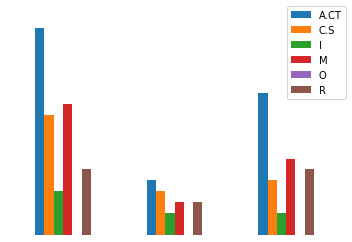

In [49]:
tipos_op_agrupado_category.unstack().plot(kind='bar')
# fig, ax = plt.subplots()
# ax.axis("off")

plt.legend(["A.CT","C.S","I","M","O","R"],bbox_to_anchor = (0.82, 0.6))
plt.ylabel("Percentage of operations")
# plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()
plt.xticks(rotation=360)

# ax.spines['right'].set_visible(False)
plt.axis('off')
plt.show()


In [50]:
df_graph=df_tipo.groupby("Category")['Type'].value_counts().to_frame()
df_graph.reset_index(level=0, inplace=True)

In [51]:
df_graph=df_graph.rename(columns={"Type": "Percentages"})

In [52]:
df_graph.reset_index(level=0, inplace=True)

In [53]:
tam_grupos=df_graph.groupby("Category").apply(lambda x: sum(x['Percentages']))
tam_grupos

Category
Academic        179
Professional    494
Student         275
dtype: int64

In [54]:
tam_grupos["Student"]

275

In [60]:
listaNueva=[]
for row in df_graph.iterrows():
    tam=tam_grupos[row[1]['Category']]
    new_per=row[1]['Percentages']/tam
    listaNueva.append(new_per)

In [64]:
df_graph['Percentages']=listaNueva
df_graph['Percentages']=df_graph['Percentages']*100
df_graph

,Type,Category,Percentages
0,Analyze Cycle Time,Academic,35.754190
1,Manipulation,Academic,22.905028
2,Calculate statistics,Academic,20.111732
3,Representation,Academic,12.290503
4,Identification,Academic,8.379888
5,Others,Academic,0.558659
6,Analyze Cycle Time,Professional,29.149798
7,Calculate statistics,Professional,22.267206
8,Manipulation,Professional,19.230769
9,Representation,Professional,18.825911


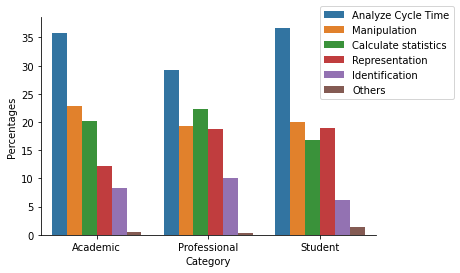

In [72]:
ax = sns.barplot(x="Category", y="Percentages", hue="Type", data=df_graph)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(bbox_to_anchor = (0.82, 0.6))
plt.savefig('categoriesPercentages2.pdf')

In [34]:
tipos_op_agrupado_category.unstack()

Type,Analyze Cycle Time,Calculate statistics,Identification,Manipulation,Others,Representation
Category,,,,,,
Academic,35,20,8,22,0,12
Professional,29,22,10,19,0,18
Student,36,16,6,20,1,18


In [29]:
ax = sns.barplot(x="Category", y="Type", hue="Type", data=tipos_op_agrupado_category)

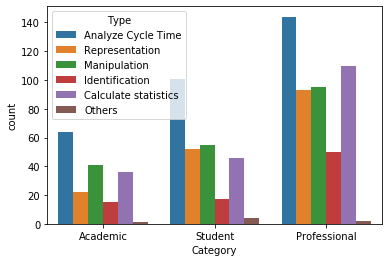

In [44]:
h = sns.countplot(x='Category', hue='Type' , data=df_tipo)

In [46]:
h

In [38]:
# sns.barplot(x='Category', y='Type', data=df_tipo, estimator=lambda x: sum(x==0)*100.0/len(x))

In [40]:
df = df_tipo
x, y, hue = "Category", "Type", "Type"
hue_order = ["Male", "Female"]

In [42]:
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
#  .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

ValueError: cannot insert Category, already exists

In [27]:
tipos_op_agrupado_category

Category      Type                
Academic      Analyze Cycle Time      35
              Manipulation            22
              Calculate statistics    20
              Representation          12
              Identification           8
              Others                   0
Professional  Analyze Cycle Time      29
              Calculate statistics    22
              Manipulation            19
              Representation          18
              Identification          10
              Others                   0
Student       Analyze Cycle Time      36
              Manipulation            20
              Representation          18
              Calculate statistics    16
              Identification           6
              Others                   1
Name: Type, dtype: int64

In [19]:
categories1=['Student','Professional','Academic']
categories2=['Student','Professional','Academic']
df = pd.DataFrame(index=['Student','Professional','Academic'],columns=['Student','Professional','Academic'])
for category1 in categories1:
    operationsCategory1=df_tipo[df_tipo["Category"]==category1]
    listaCoincidencias=[]
    for category2 in categories2:
        operationsCategory2=df_tipo[df_tipo["Category"]==category2]
        intersec=len(list(set(operationsCategory1["concept:name"]).intersection(set(operationsCategory2["concept:name"]))))
        if(category1==category2):
            intersec=0
        listaCoincidencias.append(intersec)
        
    df[category1]=listaCoincidencias

In [20]:
df

,Student,Professional,Academic
Student,0,28,19
Professional,28,0,23
Academic,19,23,0


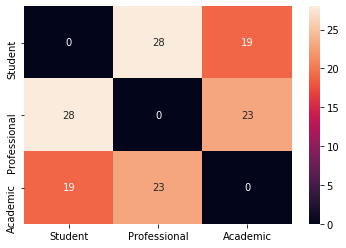

In [21]:
sns.heatmap(df, annot=True)

In [22]:
categories1=['Student','Professional','Academic']
categories2=['Student','Professional','Academic']
df2 = pd.DataFrame(index=['Student','Professional','Academic'],columns=['Student','Professional','Academic'])
for category1 in categories1:
    operationsCategory1=df_tipo[df_tipo["Category"]==category1]
    listaCoincidencias=[]
    for category2 in categories2:
        operationsCategory2=df_tipo[df_tipo["Category"]==category2]
        intersec=len(list(set(operationsCategory1["Specific operation"]).intersection(set(operationsCategory2["Specific operation"]))))
        if(category1==category2):
            intersec=0
        listaCoincidencias.append(intersec)
        
    df2[category1]=listaCoincidencias

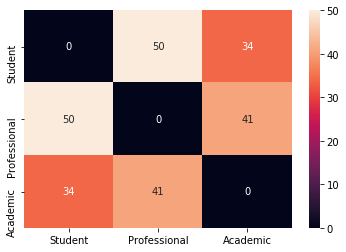

In [23]:
sns.heatmap(df2, annot=True)